# Supply Chain Analysis

In [3]:
import dask.dataframe as dd

In [4]:
data=dd.read_csv('supply_chain.csv') # supply_chain is basically a csv file in the directory with the data

In [5]:
data

,Order ID,Customer Name,Order Date,Product Category,Product Name,Order Quantity,Unit Price,Region,Total Price,Customer Segment,Shipping Mode,City,State,Shipping Cost,Order Priority
npartitions=1,,,,,,,,,,,,,,,
,string,string,string,string,string,int64,float64,string,float64,string,string,string,string,float64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
data.columns  # returns the column names

Index(['Order ID', 'Customer Name', 'Order Date', 'Product Category',
       'Product Name', 'Order Quantity', 'Unit Price', 'Region', 'Total Price',
       'Customer Segment', 'Shipping Mode', 'City', 'State', 'Shipping Cost',
       'Order Priority'],
      dtype='object')

In [7]:
data.dtypes  # returns the datatypes of the each column

Order ID            string[pyarrow]
Customer Name       string[pyarrow]
Order Date          string[pyarrow]
Product Category    string[pyarrow]
Product Name        string[pyarrow]
Order Quantity                int64
Unit Price                  float64
Region              string[pyarrow]
Total Price                 float64
Customer Segment    string[pyarrow]
Shipping Mode       string[pyarrow]
City                string[pyarrow]
State               string[pyarrow]
Shipping Cost               float64
Order Priority      string[pyarrow]
dtype: object

In [8]:
# Total Revenue per Product Category
revenue_by_category = data.groupby("Product Category")["Total Price"].sum().compute()
revenue_by_category 

Product Category
Books          27763116.45
Clothing       27610567.53
Electronics    28174568.31
Furniture      28284704.14
Grocery        27909779.44
Name: Total Price, dtype: float64

In [9]:
# Average Shipping Cost by Region
avg_shipping_cost = data.groupby("Region")["Shipping Cost"].mean().compute()
avg_shipping_cost 

Region
East     52.655965
North    52.253655
South    52.420819
West     52.654184
Name: Shipping Cost, dtype: float64

In [10]:
# Most Popular Shipping Mode
shipping_mode_counts = data["Shipping Mode"].value_counts().compute()
shipping_mode_counts

Shipping Mode
First Class       24904
Same Day          25143
Second Class      24935
Standard Class    25018
Name: count, dtype: int64[pyarrow]

In [11]:
# Revenue by Customer Segment
revenue_by_segment = data.groupby("Customer Segment")["Total Price"].sum().compute()
revenue_by_segment

Customer Segment
Consumer          34716024.45
Corporate         34716596.15
Home Office       35049959.80
Small Business    35260155.47
Name: Total Price, dtype: float64

In [12]:
# Total Revenue per Product Category
data.groupby("Product Category")["Total Price"].sum().compute()

Product Category
Books          27763116.45
Clothing       27610567.53
Electronics    28174568.31
Furniture      28284704.14
Grocery        27909779.44
Name: Total Price, dtype: float64

In [13]:
# High-Priority Orders: Count & Total Revenue
high_priority = data[data["Order Priority"] == "High"]
high_priority_summary = high_priority["Total Price"].sum().compute()
high_priority_count = high_priority.shape[0].compute()
print("High Priority Orders:", high_priority_count)
print("Total Revenue from High Priority:", high_priority_summary)


High Priority Orders: 24972
Total Revenue from High Priority: 34912293.49999999


In [14]:
# Top 5 Cities by Total Orders
city_order_counts = data["City"].value_counts().nlargest(5).compute()
city_order_counts

City
East Michael     91
Lake Michael     82
South Michael    80
North Michael    79
Port Michael     77
Name: count, dtype: int64[pyarrow]

In [15]:
# Correlation Check
numerics = data[["Order Quantity", "Unit Price", "Total Price", "Shipping Cost"]]
numerics.corr().compute()

c:\Users\Achintya Srivastawa\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\Achintya Srivastawa\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\Achintya Srivastawa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
c:\Users\Achintya Srivastawa\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Achintya Srivastawa\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_di

,Order Quantity,Unit Price,Total Price,Shipping Cost
Order Quantity,1.000000,-0.003503,0.640119,0.002020
Unit Price,-0.003503,1.000000,0.677826,0.000742
Total Price,0.640119,0.677826,1.000000,0.001364
Shipping Cost,0.002020,0.000742,0.001364,1.000000


In [16]:
from matplotlib import pyplot as plt

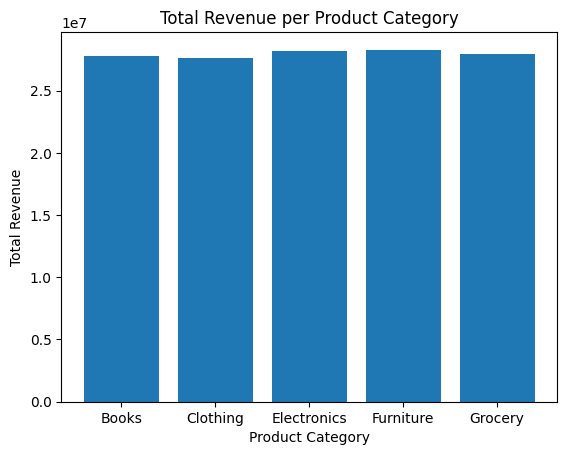

In [23]:
# Plotting the revenue by product category
plt.bar(x=revenue_by_category.index, height=revenue_by_category.values)
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.title("Total Revenue per Product Category")
plt.show()